# 📊 Netflix Data Analysis Project

**Objective:** Explore Netflix's content data to uncover trends in content type, ratings, country, and genres.  
**Dataset Source:** [Kaggle - Netflix Titles Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)

---


In [52]:
#download data from kaggle
!pip install opendatasets

In [53]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [54]:
od.download("https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv")


Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


In [55]:
netflix_data=pd.read_csv("/content/netflix-shows/netflix_titles.csv")

In [56]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [58]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# checking duplicate

In [59]:
print(netflix_data.duplicated().sum()) # check duplicates

0


# column wise exploration

In [60]:
netflix_data['title'].value_counts()

,count
title,
Zubaan,1
Dick Johnson Is Dead,1
Blood & Water,1
Ganglands,1
Jailbirds New Orleans,1
...,...
Bangkok Breaking,1
"Vendetta: Truth, Lies and The Mafia",1
The Starling,1


In [61]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [62]:
netflix_data['cast'].nunique()

7692

In [63]:
netflix_data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [64]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

# handle nan values

In [65]:
netflix_data.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [66]:
netflix_data['country'].fillna("unknown",inplace=True)
netflix_data['cast'].fillna("unknown",inplace=True)
netflix_data['director'].fillna("unknown",inplace=True)

/tmp/ipython-input-66-2715271370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['country'].fillna("unknown",inplace=True)
/tmp/ipython-input-66-2715271370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [67]:
netflix_data.dropna(inplace=True)

In [68]:
netflix_data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [69]:
netflix_data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [70]:
netflix_data['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [71]:
netflix_data['date_added'] = netflix_data['date_added'].str.strip()   #September 24, 2021      spaces in date

In [72]:
# Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [73]:
netflix_data['month_added']=netflix_data['date_added'].dt.month
netflix_data['month_name_added']=netflix_data['date_added'].dt.month_name()
netflix_data['year_added']=netflix_data['date_added'].dt.year

In [74]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


#standardize text for cols

In [75]:
netflix_data['title']=netflix_data['title'].str.strip().str.lower()
netflix_data['rating']=netflix_data['rating'].str.strip()

In [76]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,dick johnson is dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,blood & water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [77]:
netflix_data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [78]:
def set_time(input):
    a, _ = input.split()  # input is like "90 min"
    a = int(a)             # convert to integer

    if a < 15:
      if 'Season' or 'Seasons' in input:       # handle TV Shows
        return input
      return "0-15 min"
    elif 15 <= a < 45:
        return "15-45 min"
    elif 45 <= a < 75:
        return "45-75 min"
    elif 75 <= a < 110:
        return "75-110 min"
    elif 110 <= a < 150:
        return "110-150 min"
    elif 150 <= a < 200:
        return "150-200 min"
    else:
        return "200+ min"


In [79]:
netflix_data['new_duration']=netflix_data['duration'].apply(set_time)

In [80]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,new_duration
0,s1,Movie,dick johnson is dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,75-110 min
1,s2,TV Show,blood & water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,2 Seasons
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1 Season


#  Bivariate Analysis

In [81]:
# Extract duration number
netflix_data['duration_type'] = netflix_data['duration'].str.extract(r'(\D+)$')   # e.g., 'min', 'Seasons'
netflix_data['duration_int'] = netflix_data['duration'].str.extract(r'(\d+)').astype(float)

/tmp/ipython-input-82-1629583694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_duration_avg, x='type', y='duration_int', palette='pastel')


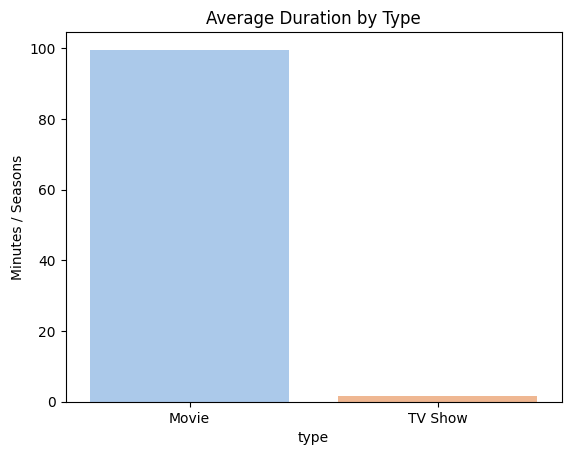

In [82]:
# Average duration per type
df_duration_avg = netflix_data.groupby('type')['duration_int'].mean().reset_index()

sns.barplot(data=df_duration_avg, x='type', y='duration_int', palette='pastel')
plt.title("Average Duration by Type")
plt.ylabel("Minutes / Seasons")
### plt.savefig("Average Duration by Type", dpi=300, bbox_inches='tight')
plt.show()


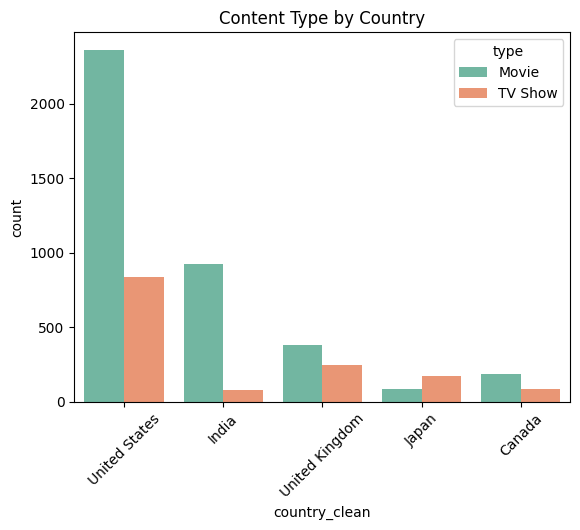

In [83]:
#Country vs Content Count
top5 = ['United States', 'India', 'United Kingdom', 'Japan', 'Canada']
netflix_data['country_clean'] = netflix_data['country'].fillna('Unknown').str.split(',').str[0]
df_top5 = netflix_data[netflix_data['country_clean'].isin(top5)]

sns.countplot(data=df_top5, x='country_clean', hue='type', palette='Set2')
plt.title("Content Type by Country")
plt.xticks(rotation=45)
### plt.savefig("Content Type by Country", dpi=300, bbox_inches='tight')
plt.show()


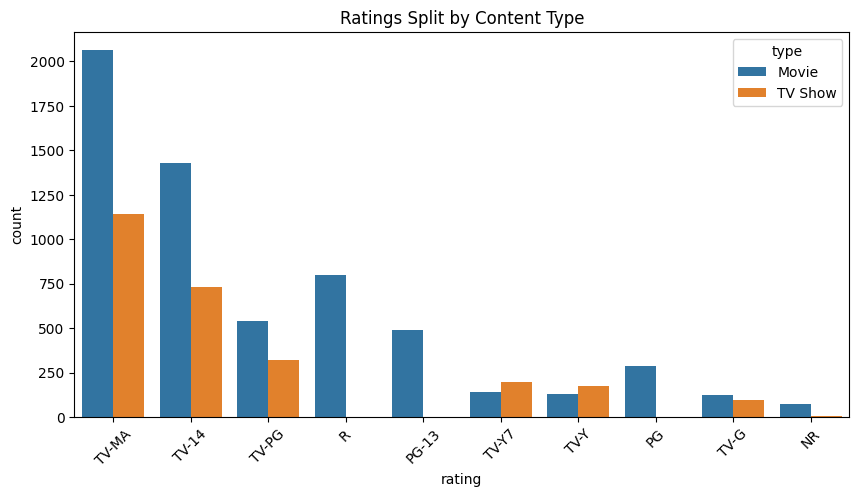

In [84]:
# Ratings by Type
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_data, x='rating', hue='type', order=netflix_data['rating'].value_counts().index[:10])
plt.title("Ratings Split by Content Type")
plt.xticks(rotation=45)
### plt.savefig("Ratings Split by Content Type", dpi=300, bbox_inches='tight')
plt.show()


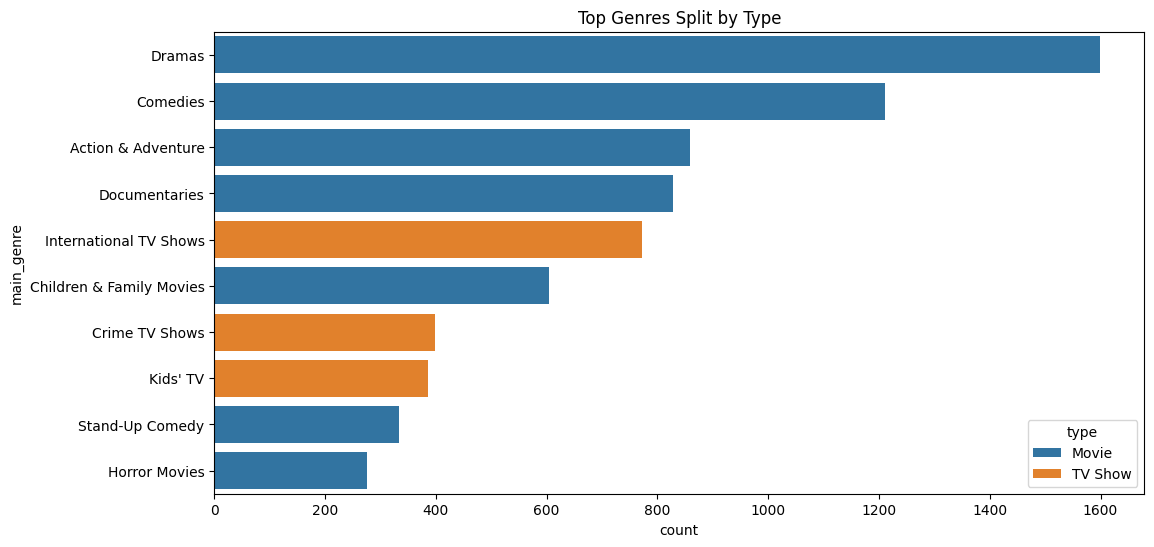

In [85]:
# Genre vs Type
netflix_data['main_genre'] = netflix_data['listed_in'].dropna().apply(lambda x: x.split(',')[0])

plt.figure(figsize=(12,6))
sns.countplot(data=netflix_data, y='main_genre', hue='type', order=netflix_data['main_genre'].value_counts().head(10).index)
plt.title("Top Genres Split by Type")
### plt.savefig("Top Genres Split by Type", dpi=300, bbox_inches='tight')
plt.show()


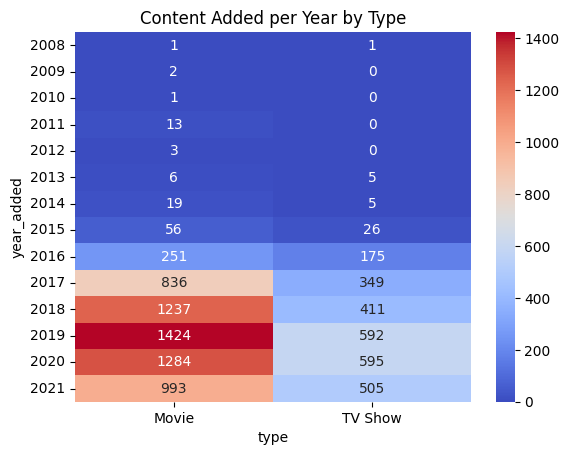

In [86]:
# Heatmap of Content Count by Year & Type
pivot = pd.crosstab(netflix_data['year_added'], netflix_data['type'])
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title("Content Added per Year by Type")
### plt.savefig("Content Added per Year by Type", dpi=300, bbox_inches='tight')
plt.show()


# Trend Analysis (Time, Ratings, Countries)

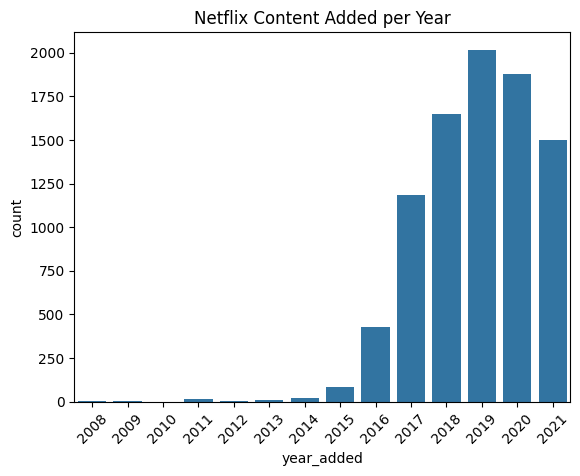

In [87]:
# Content Added by Year
sns.countplot(data=netflix_data, x='year_added', order=sorted(netflix_data['year_added'].dropna().unique()))
plt.title("Netflix Content Added per Year")
plt.xticks(rotation=45)
### plt.savefig("Netflix Content Added per Year", dpi=300, bbox_inches='tight')
plt.show()


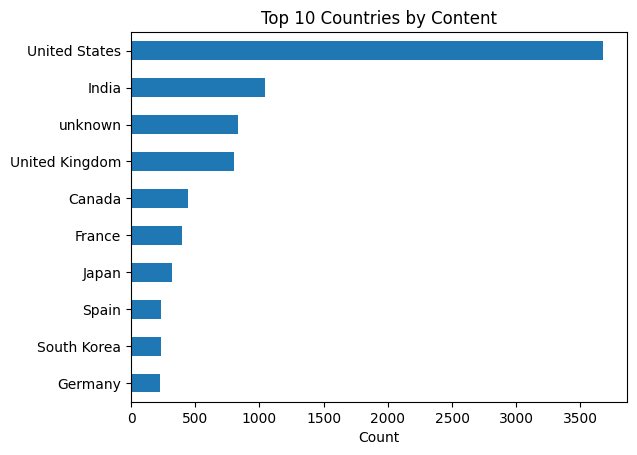

In [88]:
#Top 10 Countries
top_countries = netflix_data['country'].dropna().str.split(', ')
flat = [i for sublist in top_countries for i in sublist]
pd.Series(flat).value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Countries by Content")
plt.xlabel("Count")
plt.gca().invert_yaxis()
### plt.savefig("Top 10 Countries by Content", dpi=300, bbox_inches='tight')
plt.show()


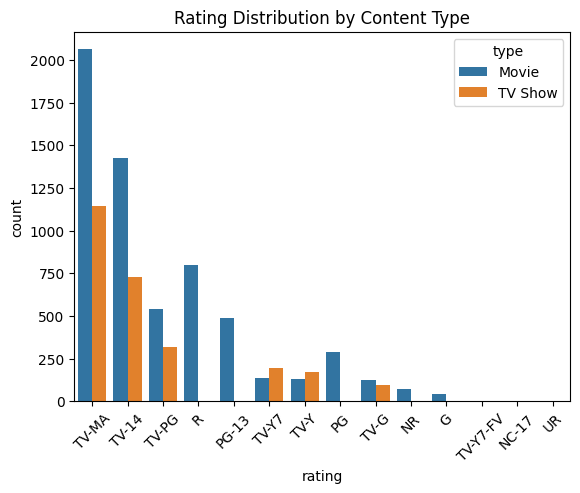

In [89]:
sns.countplot(data=netflix_data, x='rating', hue='type', order=netflix_data['rating'].value_counts().index)
plt.title("Rating Distribution by Content Type")
plt.xticks(rotation=45)
### plt.savefig("Rating Distribution by Content Type", dpi=300, bbox_inches='tight')
plt.show()


# Visuals + Insights Polishing  /  Deep Genre & Duration Analysis

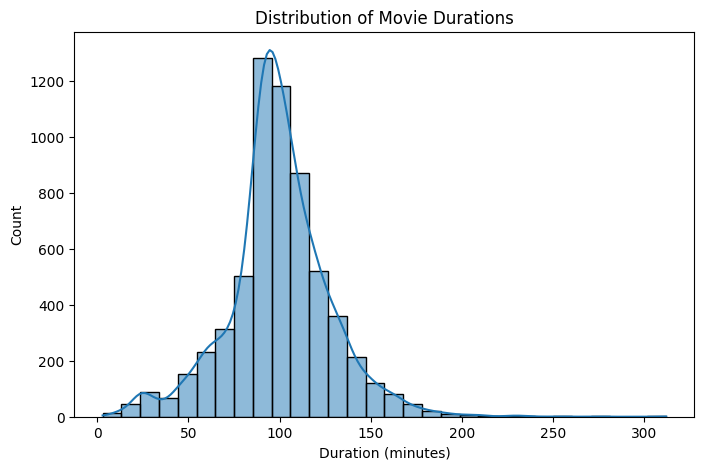

In [90]:
# visuals 1
# Convert duration column (only for movies)
df_movies = netflix_data[netflix_data['type'] == 'Movie'].copy()
df_movies['duration_int'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_movies['duration_int'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
### plt.savefig("Distribution of Movie Durations", dpi=300, bbox_inches='tight')
plt.show()


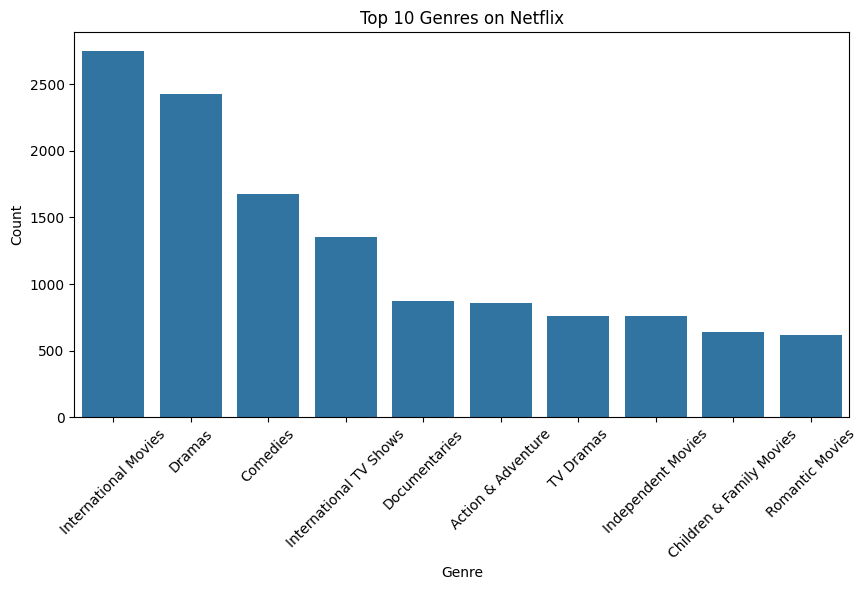

In [91]:
# visual 2
from collections import Counter

# Split and flatten genre list
genre_series = netflix_data['listed_in'].dropna().str.split(', ')
genres = [g for sublist in genre_series for g in sublist]

# Count top 10 genres
top_genres = Counter(genres).most_common(10)
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=genres_df, x='Genre', y='Count')
plt.xticks(rotation=45)
plt.title("Top 10 Genres on Netflix")
### plt.savefig("Top 10 Genres on Netflix", dpi=300, bbox_inches='tight')
plt.show()


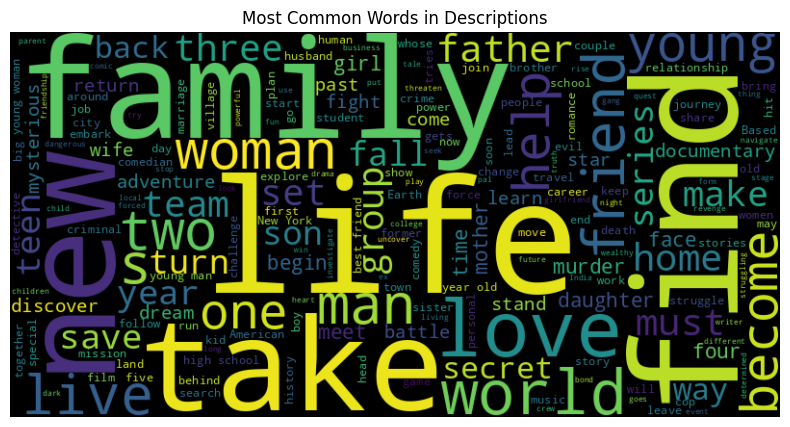

In [92]:
from wordcloud import WordCloud

text = " ".join(netflix_data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Descriptions")
### plt.savefig("Most Common Words in Descriptions", dpi=300, bbox_inches='tight')
plt.show()


### 🔍 Key Insights from Netflix EDA

- 🎬 **Movies dominate** the Netflix catalog (~70% of all content).
- 🗓️ Most content was added **after 2017**, peaking in 2019–2020.
- 🌍 **USA, India, and UK** are the top producers of Netflix content.
- 🔞 Netflix offers mature content, with **TV-MA and R** ratings most common.
- 🕒 Movies usually last **90–100 minutes**, while TV Shows average 1–2 seasons.
- 🎭 **Dramas**, **Comedies**, and **International Movies** are top genres globally.


### ✅ Thank you for reading!  
Project by Hemant Karpe
